### 회귀분석 순서
1. 데이터를 확인
2. 데이터를 정제
3. 데이터를 분할
4. 데이터를 스케일링
5. 모델 학습
6. 성능 평가 및 예측값 저장

In [1]:
import pandas as pd

In [2]:
# boston.csv 파일 로드
boston = pd.read_csv('../../../../csv/boston.csv')

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# 데이터의 분포도를 확인
# price와 나머지 컬럼들의 데이터 분포도 
import matplotlib.pyplot as plt
import seaborn as sns

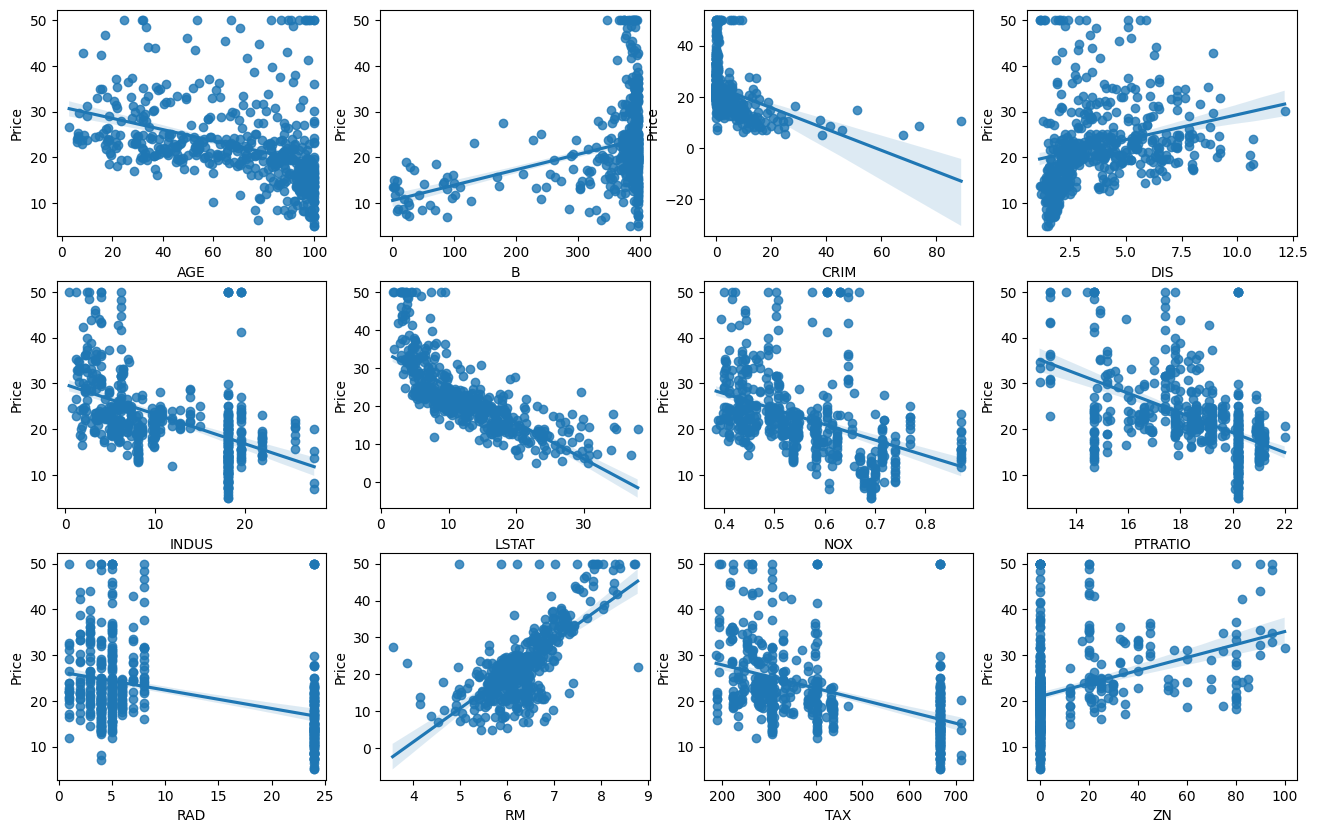

In [11]:
# 그래프를 12개의 공간으로 나눠준다.
fig, axs = plt.subplots(
    figsize = (16,10),
    ncols = 4, 
    nrows = 3,
)
# 특정 컬럼의 이름을 제거한 리스트를 생성
features = boston.columns.difference(['Price', 'CHAS'])

for i, feature in zip(range(12),features):
    # i는 0부터 11까지 반복
    # 좌표 값을 생성
    row = int(i/4)       # 0, 0, 0, 0, 1, 1, 1, 1, ...
    col = i % 4          # 나누어서 나머지 값 0, 1, 2, 3, 0, 1, 2, ...
    sns.regplot(
        x = feature,
        y = boston['Price'],
        data = boston,
        ax = axs[row][col]
    )
plt.show()



In [14]:
# 데이터를 분할
from sklearn.model_selection import train_test_split

In [12]:
x = boston[features].values
y = boston['Price'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [16]:
print('train 데이터에서 price의 평균', y_train.mean())
print('test 데이터에서 price의 평균', y_test.mean())

train 데이터에서 price의 평균 22.796534653465343
test 데이터에서 price의 평균 21.488235294117644


In [22]:
# 스케일러를 이용하여 각 데이터들의 범위를 고정
# min-max 스케일러를 이용한 스케일링
from sklearn.preprocessing import MinMaxScaler

# class 생성
scaler = MinMaxScaler()

x_train_sc = scaler.fit_transform(x_train)

y_test_sc = scaler.fit_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
# 모델 학습 
# 회귀 분석(linearRegression)
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

# 모델 학습 데이터를 대입
linear.fit(x_train_sc, y_train)

LinearRegression()

In [21]:
# predict() 함수를 이용하여 학습데이터를 예측 값 저장
pred = linear.predict(x_train_sc)
pred

array([11.02017669, 19.48872972, 23.05182653, 12.1079569 , 18.42155618,
       25.38146107, 20.8928292 , 23.90411085,  7.82959981, 19.73805199,
       21.97281158, 27.76801918, 33.03015745, 15.34411885, 35.71812592,
       12.91027516, 20.84226241, 28.43916796, 15.55682006, 24.49893072,
        4.29979805, 23.91083186, 25.66725005, 23.11141337, 24.58027338,
       34.4037489 , 17.4441076 , 39.55272479, 15.01251447, 24.65458658,
       18.08151874, 20.91582428,  9.99801426, 21.0485848 , 22.42259117,
       32.10783373, 31.16921557, 15.70602349, 17.02701362, 28.30143768,
       24.27953871, 14.06322565,  6.83013462, 27.11430257, 20.4787753 ,
       17.92101512, 13.71756884, 41.53395676, 16.70560693, 18.65776755,
       25.46989385, 23.758659  , 22.10760007, 20.90975282, 17.06282167,
       23.40892677, 29.28865306,  7.58654617, 24.7099421 , 17.26388083,
       21.07674999, 25.31618377, 27.78004669, 21.40453444, 42.29856727,
       19.45653582, 15.37854089, 19.47881897, 17.09906717, 23.02

In [23]:
# test 데이터를 이용한 예측값 저장
pred_t = linear.predict(x_test_sc)

In [24]:
pred_df = pd.DataFrame(pred, columns = ['pred price'])
atual = pd.DataFrame(y_train, columns = ['actual price'])

In [25]:
df = pd.concat([pred_df, atual], axis= 1)
df.head()

,pred price,actual price
0,11.020177,12.0
1,19.488730,19.9
2,23.051827,19.4
3,12.107957,13.4
4,18.421556,18.2


In [26]:
pred_t_df = pd.DataFrame(pred_t, columns=['pred price'])
actual2 = pd.DataFrame(y_test, columns=['actual price'])
df2 = pd.concat([pred_t_df, actual2], axis=1)
df2.head()

,pred price,actual price
0,32.309835,23.6
1,36.710487,32.4
2,17.384889,13.6
3,27.467651,22.8
4,21.220020,16.1
